# Sentiment Analysis on Semiconductor Reddit with Python’s Natural Language Toolkit (NLTK)

In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
from apikeys import reddit_client_id, reddit_client_secret, reddit_user_agent
import praw

reddit = praw.Reddit(client_id=reddit_client_id,
                     client_secret=reddit_client_secret,
                     user_agent=reddit_user_agent)

Version 7.3.0 of praw is outdated. Version 7.4.0 was released Friday July 30, 2021.


In [3]:
headlines = set()
sub_set = {'amd', 'nvidia', 'intel'}

In [4]:
for item in sub_set:
    for submission in reddit.subreddit(item).new(limit=None):
        headlines.add(submission.title)
        display.clear_output()
        print(len(headlines))

2824


In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:7], width=100)

[{'compound': -0.3818,
  'headline': 'The lowest 2 DLSS Modes vs the highest 2 FSR Modes',
  'neg': 0.245,
  'neu': 0.755,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Getting the most out of a 6900xt in a nzxt H210',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.296,
  'headline': 'No Saturation, Hue Options in Intel Graphics Command Center',
  'neg': 0.216,
  'neu': 0.784,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'PSA for anyone with the XFX Merc 6900XT (XTXH version)',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Updating AsRock B450m Bios w/ Ryzen 2600',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Finally completed my Build after half a year!',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'TSMC is evaluating Germany of possible location of a European Arm - Techspot',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [7]:
df = pd.DataFrame.from_records(results)
df.head(n=7)

,neg,neu,pos,compound,headline
0,0.245,0.755,0.0,-0.3818,The lowest 2 DLSS Modes vs the highest 2 FSR M...
1,0.000,1.000,0.0,0.0000,Getting the most out of a 6900xt in a nzxt H210
2,0.216,0.784,0.0,-0.2960,"No Saturation, Hue Options in Intel Graphics C..."
3,0.000,1.000,0.0,0.0000,PSA for anyone with the XFX Merc 6900XT (XTXH ...
4,0.000,1.000,0.0,0.0000,Updating AsRock B450m Bios w/ Ryzen 2600
5,0.000,1.000,0.0,0.0000,Finally completed my Build after half a year!
6,0.000,1.000,0.0,0.0000,TSMC is evaluating Germany of possible locatio...


In [8]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head(n=7)

,neg,neu,pos,compound,headline,label
0,0.245,0.755,0.0,-0.3818,The lowest 2 DLSS Modes vs the highest 2 FSR M...,-1
1,0.000,1.000,0.0,0.0000,Getting the most out of a 6900xt in a nzxt H210,0
2,0.216,0.784,0.0,-0.2960,"No Saturation, Hue Options in Intel Graphics C...",-1
3,0.000,1.000,0.0,0.0000,PSA for anyone with the XFX Merc 6900XT (XTXH ...,0
4,0.000,1.000,0.0,0.0000,Updating AsRock B450m Bios w/ Ryzen 2600,0
5,0.000,1.000,0.0,0.0000,Finally completed my Build after half a year!,0
6,0.000,1.000,0.0,0.0000,TSMC is evaluating Germany of possible locatio...,0


In [9]:
df2 = df[['headline', 'label']]

In [10]:
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [11]:
df.label.value_counts()

 0    1802
 1     727
-1     295
Name: label, dtype: int64

In [12]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:7], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:7], width=200)

Positive headlines:

['[ETA PRIME] SUPER Small No GPU Needed Gaming / EMU Build RYZEN 5300G',
 "Voided my 6800's warranty, like 2 months after I got it. Totally worth it. Junction temps do not exceed 70c. I captioned the pics, so my gma can understand what I did. It was a great deal of "
 'money, but I intend on putting it on a 6900xt one day',
 'GALAX OC Lab announces GeForce RTX 3080 Ti Hall of Fame graphics card',
 'Enter for a chance to win one of THREE Dell Intel Evo laptops in the “Dell Intel Evo laptop giveaway” - August 2nd - August 8th',
 'ZDNet: "Nvidia CEO eschews mobile RTX in favour of GeForce Now"',
 "[Jarrod'sTech] Lenovo Legion 5 (2021) Review - Still Best Ryzen Gaming Laptop?",
 'Good upgrade?']

Negative headlines:

['The lowest 2 DLSS Modes vs the highest 2 FSR Modes',
 'No Saturation, Hue Options in Intel Graphics Command Center',
 'NVIDIA RTX A2000 desktop workstation graphics card is low profile - VideoCardz.com',
 'Intel leak suggests Thunderbolt 5 could offer up

In [13]:
df.label.value_counts(normalize=True) * 100

 0    63.810198
 1    25.743626
-1    10.446176
Name: label, dtype: float64

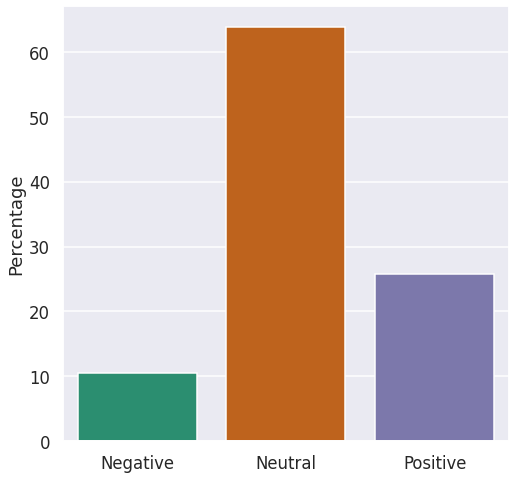

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [15]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [16]:
tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(example))

['This', 'is', 'an', 'example', 'sentence', 'However', 'it', 'isn', 't', 'a', 'very', 'informative', 'one']


In [17]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [18]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [19]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('amd', 94),
 ('intel', 92),
 ('rtx', 73),
 ('help', 68),
 ('ryzen', 61),
 ('best', 54),
 ('nvidia', 53),
 ('super', 52),
 ('good', 50),
 ('support', 49),
 ('gaming', 44),
 ('3080', 43),
 ('gpu', 39),
 ('worth', 39),
 ('5', 38),
 ('pc', 35),
 ('2', 34),
 ('new', 34),
 ('vs', 33),
 ('cpu', 32)]

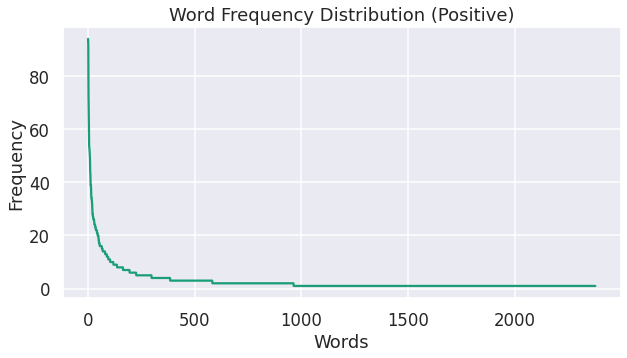

In [20]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

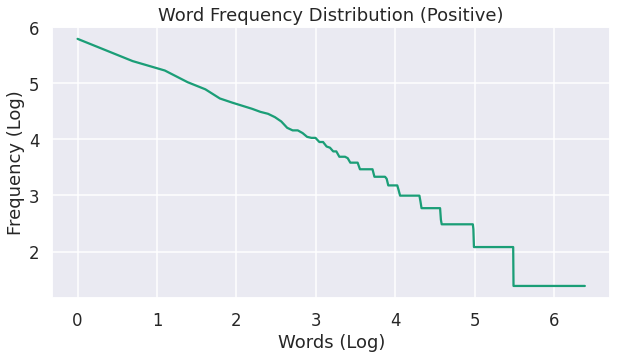

In [21]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [22]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('amd', 42),
 ('intel', 41),
 ('2', 26),
 ('dlss', 26),
 ('rtx', 26),
 ('nvidia', 23),
 ('ryzen', 20),
 ('gpu', 18),
 ('fsr', 17),
 ('low', 17),
 ('cpu', 17),
 ('red', 17),
 ('vs', 15),
 ('i7', 15),
 ('new', 15),
 ('xt', 15),
 ('videocardz', 13),
 ('rx', 13),
 ('geforce', 13),
 ('problem', 12)]

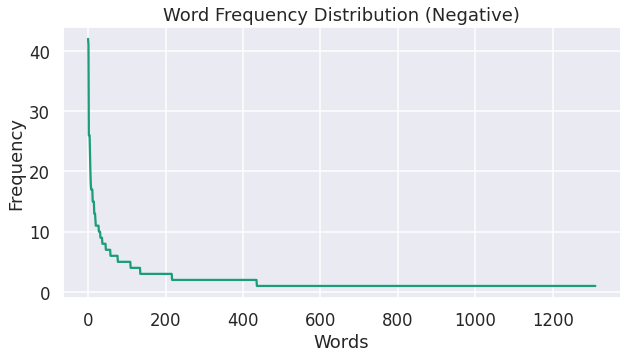

In [23]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

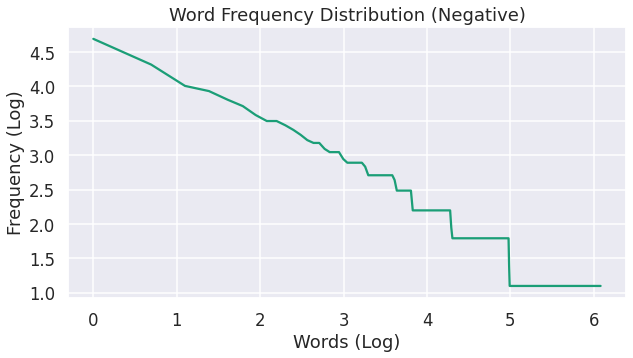

In [24]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()